<a href="https://colab.research.google.com/github/saxonyanders/saxonyanders/blob/main/Iraq_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lineplot total pop. / governorates / years

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
iraq_pop_df = pd.read_csv('/content/IRAQ_GOV_GENDER_AGE(aggregated_years_total) (3).csv')

iraq_pop_df

,Unnamed: 0,Population years,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,gov_code,1997.0,2009.0,2018.0,2021.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,anbar,1023736.0,1483359.0,1771656.0,1914165.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,basra,1556445.0,2405434.0,2908491.0,3142449.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,muthanna,436825.0,683126.0,814371.0,879874.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,najaf,775042.0,1221228.0,1471592.0,1589961.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
def process_all_governorates(iraq_pop_df):
    """
    Process all governorates and create a comprehensive dataset
    """
    all_data = []

    # Extract years from the first row and create a mapping from year to column index
    year_to_col_index = {}
    # Start from the second column (index 1)
    for i, col_value in enumerate(iraq_pop_df.iloc[0, 1:].tolist()):
        if pd.notna(col_value):
            try:
                year = str(int(col_value))
                if year.isdigit():
                    # Add 1 to the index because we started iterating from the second column
                    year_to_col_index[year] = i + 1
            except (ValueError, TypeError):
                continue

    years = list(year_to_col_index.keys())

    print(f"Extracted years and column mapping: {year_to_col_index}")

    # Get all unique governorate names (excluding NaN and the header)
    # We start from the second row to avoid the header row
    governorates_data = iraq_pop_df.iloc[1:].dropna(subset=['Unnamed: 0'])

    print(f"Governorates data shape after dropping NaNs: {governorates_data.shape}")
    print(f"Sample of governorates_data:\n{governorates_data.head()}")

    # Iterate through each governorate row
    for index, row in governorates_data.iterrows():
        gov = row['Unnamed: 0']
        # print(f"Processing governorate: {gov}") # Keep this for debugging if needed
        # Extract population data for the current governorate using the column indices
        population_data = []
        for year in years:
            col_index = year_to_col_index.get(year)
            if col_index is not None:
                population = row.iloc[col_index]
                population_data.append(population)
            else:
                population_data.append(None) # Append None if column index not found for a year


        # print(f"Population data for {gov}: {population_data}") # Keep this for debugging if needed

        # Ensure the number of years and population data points match
        if len(years) == len(population_data):
            for i, year_str in enumerate(years):
                population = population_data[i]
                # Convert population to numeric, handling potential commas and errors
                try:
                    population = float(str(population).replace(',', ''))
                except (ValueError, TypeError):
                    population = None # Set to None or NaN if conversion fails

                if population is not None:
                     all_data.append({
                        'Governorate': str(gov).title(),
                        'Year': int(year_str),
                        'Population': population
                    })
        else:
            print(f"Warning: Year and population data mismatch for governorate: {gov}. Expected {len(years)} data points, but found {len(population_data)}. Skipping or partially processing.")


    return pd.DataFrame(all_data)

# Call the function and see the results
iraq_population_clean = process_all_governorates(iraq_pop_df)
iraq_population_clean

Extracted years and column mapping: {'1997': 1, '2009': 2, '2018': 3, '2021': 4}
Governorates data shape after dropping NaNs: (18, 67)
Sample of governorates_data:
  Unnamed: 0  Population years  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
1      anbar         1023736.0   1483359.0   1771656.0   1914165.0   
2      basra         1556445.0   2405434.0   2908491.0   3142449.0   
3   muthanna          436825.0    683126.0    814371.0    879874.0   
4      najaf          775042.0   1221228.0   1471592.0   1589961.0   
5  qadissiya          751331.0   1077614.0   1291048.0   1394885.0   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
1         NaN         NaN         NaN         NaN         NaN  ...   
2         NaN         NaN         NaN         NaN         NaN  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   
5         NaN         NaN         NaN         NaN         NaN  ..

,Governorate,Year,Population
0,Anbar,1997,1023736.0
1,Anbar,2009,1483359.0
2,Anbar,2018,1771656.0
3,Anbar,2021,1914165.0
4,Basra,1997,1556445.0
...,...,...,...
67,Salah_Al_Din,2021,1723546.0
68,Wassit,1997,783614.0
69,Wassit,2009,1150079.0
70,Wassit,2018,1378723.0


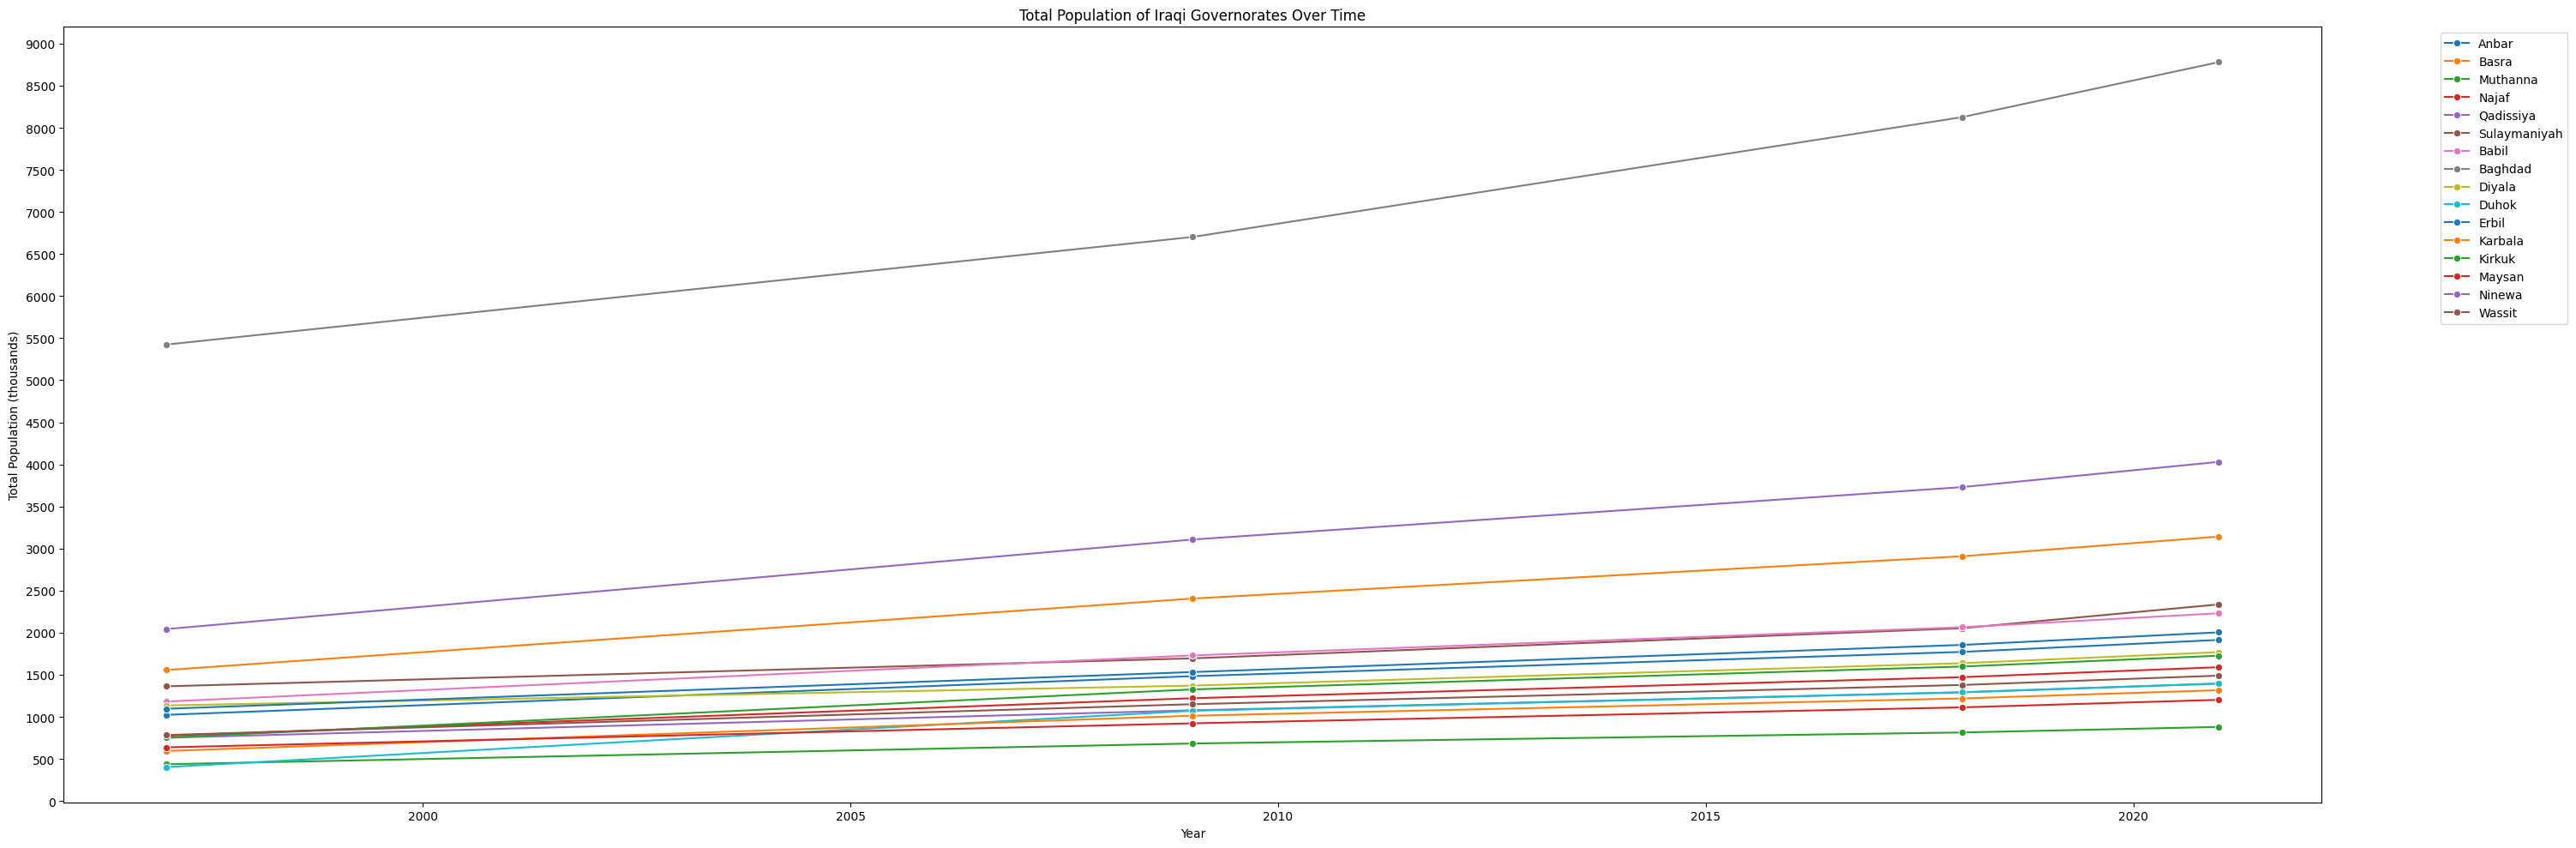

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

fig, ax = plt.subplots(figsize=(30, 10))

governorates_to_plot = ['Anbar', 'Basra', 'Muthanna', 'Najaf', 'Qadissiya',
                       'Sulaymaniyah', 'Babil', 'Baghdad', 'Dhi Qar', 'Diyala',
                       'Duhok', 'Erbil', 'Karbala', 'Kirkuk', 'Maysan',
                       'Ninewa', 'Salah Al Din', 'Wassit']

for gov in governorates_to_plot:
    gov_data = iraq_population_clean[iraq_population_clean['Governorate'] == gov]
    if not gov_data.empty:
        sns.lineplot(
            data=gov_data,
            x='Year',
            y='Population',
            ax=ax,
            label=gov,
            marker='o'
        )

ax.set_title('Total Population of Iraqi Governorates Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Total Population (thousands)')

# Format y-axis to show population in thousands for readability
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}'))

# Set y-axis major locator to have more indicators, e.g., every 500,000
ax.yaxis.set_major_locator(mticker.MultipleLocator(500000))


ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
iraq_pop_gender_age_df = pd.read_csv('/content/IRAQ_GOV_GENDER_AGE(aggregated_years_clean).csv')
display(iraq_pop_gender_age_df.head())

,gov_code,year,total_pop,female_total,male_total,F_00_04,F_05_19,F_20_24,F_25_29,F_30_34,...,M_35_39,M_40_44,M_45_49,M_50_54,M_55_59,M_60_64,M_65_69,M_70_74,M_75_79,M_80Plus
0,anbar,1997,1023736,497800,525936,79722,185254,46701,36351,33015,...,27351,24754,18213,10416,12551,7330,5345,2936,1523,1564
1,anbar,2009,1483359,721296,762063,115515,268426,67668,52671,47837,...,39631,35867,26390,15093,18185,10621,7745,4254,2207,2267
2,anbar,2018,1771656,861483,910173,137965,320596,80819,62908,57134,...,47334,42838,31519,18026,21720,12685,9250,5080,2636,2707
3,anbar,2021,1914165,930779,983386,149063,346384,87320,67968,61730,...,51141,46284,34054,19476,23467,13705,9994,5489,2848,2925
4,basra,1997,1556445,774541,781904,121840,289285,65952,55627,52698,...,44473,37421,29632,16871,18904,13218,9248,5466,3392,3300


# Population pyramid
Create a population pyramid for each governorate using the data from "/content/IRAQ_GOV_GENDER_AGE(aggregated_years_clean).csv".

In [15]:
print(iraq_pop_gender_age_df['year'].unique())
print(iraq_pop_gender_age_df['gov_code'].unique())

[1997 2009 2018 2021]
['anbar' 'basra' 'muthanna' 'najaf' 'qadissiya' 'sulaymaniyah' 'babil'
 'baghdad' 'dhi_qar' 'diyala' 'duhok' 'erbil' 'karbala' 'kirkuk' 'maysan'
 'ninewa' 'salah_al_din' 'wassit']


In [16]:
selected_year = 2021
selected_governorate = 'baghdad'

print(f"Selected year: {selected_year}")
print(f"Selected governorate: {selected_governorate}")

Selected year: 2021
Selected governorate: baghdad


In [17]:
# 1. Filter the DataFrame for the selected year and governorate
governorate_data_selected_year = iraq_pop_gender_age_df[
    (iraq_pop_gender_age_df['year'] == selected_year) &
    (iraq_pop_gender_age_df['gov_code'] == selected_governorate)
].iloc[0]

# 2. Identify the columns that represent female and male population by age group
female_cols = [col for col in iraq_pop_gender_age_df.columns if col.startswith('F_')]
male_cols = [col for col in iraq_pop_gender_age_df.columns if col.startswith('M_')]

# 3. Extract and order the age group labels
# Assuming the age groups are already in a plottable order in the column names
age_groups = [col.replace('F_', '') for col in female_cols]

# 4. Create lists for female and male population values
female_population = governorate_data_selected_year[female_cols].values.tolist()
male_population = governorate_data_selected_year[male_cols].values.tolist()

print(f"Selected Governorate: {selected_governorate.title()}")
print(f"Selected Year: {selected_year}")
print(f"Age Groups: {age_groups}")
print(f"Female Population Data: {female_population}")
print(f"Male Population Data: {male_population}")

Selected Governorate: Baghdad
Selected Year: 2021
Age Groups: ['00_04', '05_19', '20_24', '25_29', '30_34', '35_39', '40_44', '45_49', '50_54', '55_59', '60_64', '65_69', '70_74', '75_79', '80Plus']
Female Population Data: [np.int64(578736), np.int64(1416520), np.int64(392110), np.int64(321555), np.int64(311427), np.int64(275679), np.int64(261131), np.int64(213499), np.int64(162793), np.int64(133948), np.int64(96958), np.int64(70343), np.int64(39114), np.int64(24676), np.int64(26623)]
Male Population Data: [np.int64(604487), np.int64(1541283), np.int64(571810), np.int64(499860), np.int64(469613), np.int64(434675), np.int64(332967), np.int64(299691), np.int64(267349), np.int64(250226), np.int64(210066), np.int64(145084), np.int64(127698), np.int64(93619), np.int64(66986), np.int64(42517), np.int64(19114), np.int64(19548)]


['gov_code', 'year', 'total_pop', 'female_total', 'male_total', 'F_00_04', 'F_05_19', 'F_20_24', 'F_25_29', 'F_30_34', 'F_35_39', 'F_40_44', 'F_45_49', 'F_50_54', 'F_55_59', 'F_60_64', 'F_65_69', 'F_70_74', 'F_75_79', 'F_80Plus', 'M_00_04', 'M_05_19', 'M_05_09', 'M_10_14', 'M_15_19', 'M_20_24', 'M_25_29', 'M_30_34', 'M_35_39', 'M_40_44', 'M_45_49', 'M_50_54', 'M_55_59', 'M_60_64', 'M_65_69', 'M_70_74', 'M_75_79', 'M_80Plus']
Length of age_groups after correction: 15
Length of female_population after correction: 15
Length of male_population after correction: 15


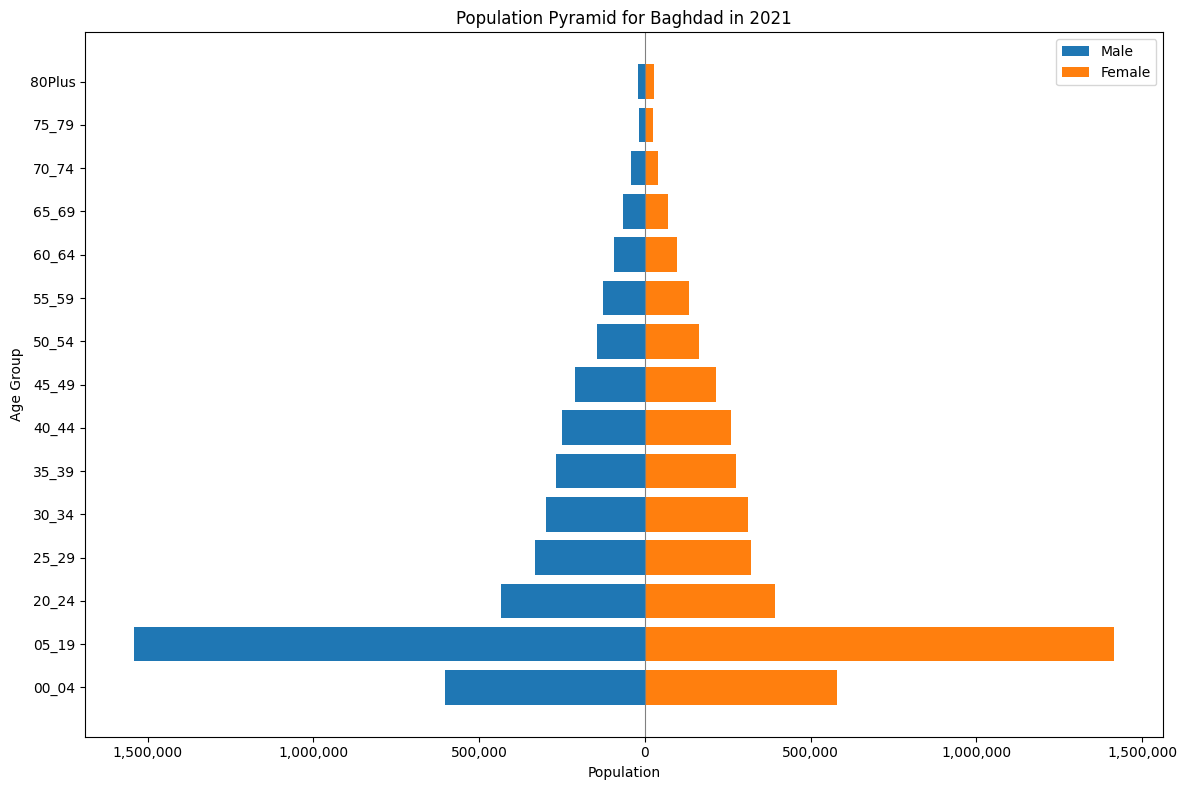

In [22]:
print(iraq_pop_gender_age_df.columns.tolist())

# Re-identify the columns that represent female and male population by age group
female_cols = [col for col in iraq_pop_gender_age_df.columns if col.startswith('F_')]
# Manually inspect the column list to find the matching male age group columns
male_cols = [col for col in iraq_pop_gender_age_df.columns if col.startswith('M_') and col.replace('M_', '') in [f.replace('F_', '') for f in female_cols]]


# Assuming the age groups are consistent between male and female columns
age_groups = [col.replace('F_', '') for col in female_cols]

# Extract population data based on the filtered row and identified columns
female_population = governorate_data_selected_year[female_cols].values.tolist()
male_population = governorate_data_selected_year[male_cols].values.tolist()

print(f"Length of age_groups after correction: {len(age_groups)}")
print(f"Length of female_population after correction: {len(female_population)}")
print(f"Length of male_population after correction: {len(male_population)}")

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(12, 8))

# Create horizontal bar chart for male population (as negative values)
ax.barh(age_groups, [-pop for pop in male_population], label='Male')

# Create horizontal bar chart for female population (as positive values)
ax.barh(age_groups, female_population, label='Female')

# Set labels and title
ax.set_xlabel('Population')
ax.set_ylabel('Age Group')
ax.set_title(f'Population Pyramid for {selected_governorate.title()} in {selected_year}')

# Format the x-axis to show absolute population values
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{abs(x):,.0f}'))

# Add legend
ax.legend()

# Invert the y-axis to have the youngest age group at the bottom
# ax.invert_yaxis() # Commenting out or removing this line will invert the y-axis

# Add a vertical line at 0 for better separation
ax.axvline(0, color='grey', linewidth=0.8)

plt.tight_layout()
plt.show()

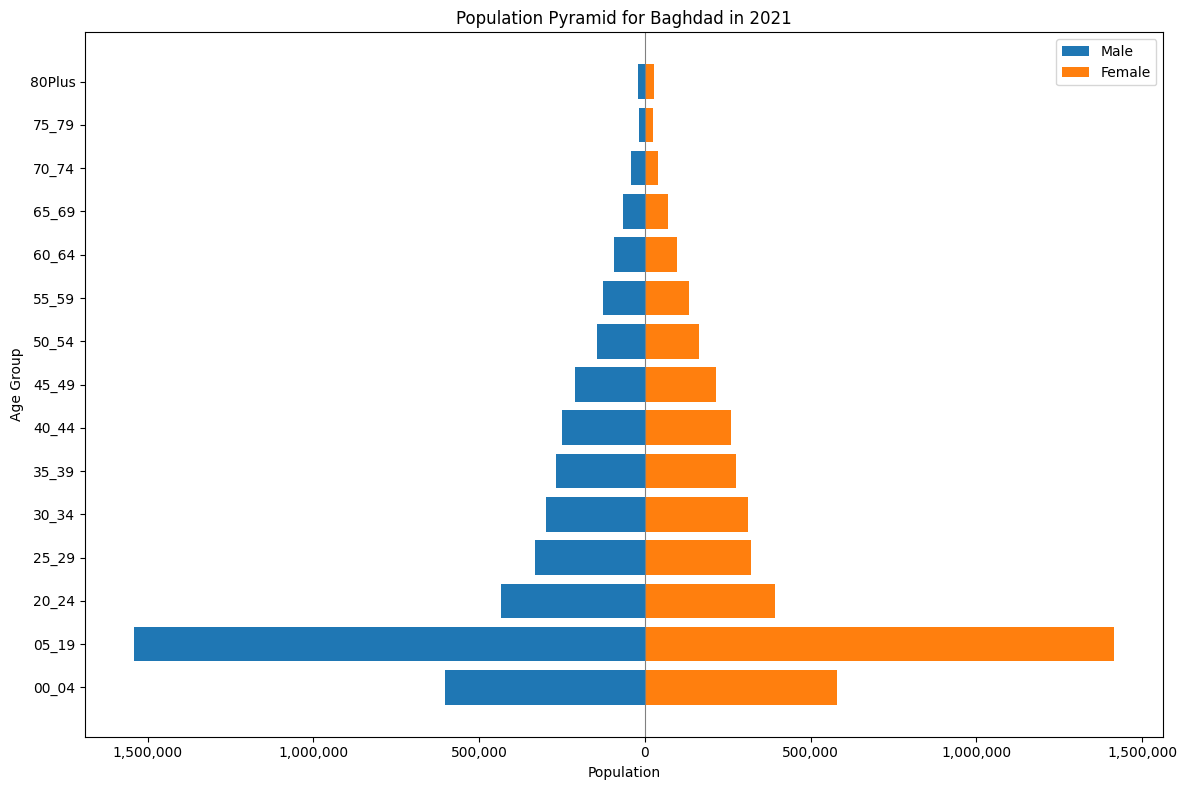

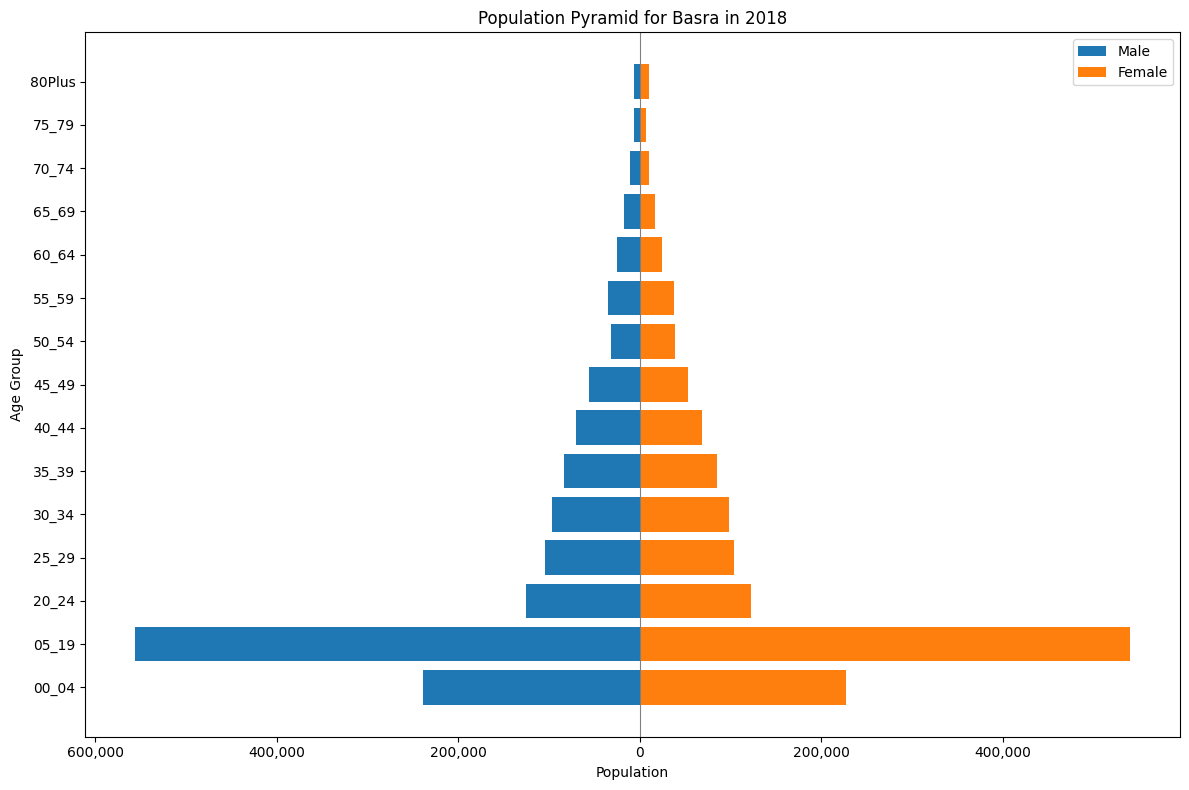

In [23]:
def plot_population_pyramid(df, governorate, year):
    """
    Generates a population pyramid for a given governorate and year.

    Args:
        df (pd.DataFrame): The DataFrame containing population data by gender and age group.
        governorate (str): The name of the governorate to plot.
        year (int): The year for which to plot the data.
    """
    # Filter the DataFrame for the selected year and governorate
    governorate_data_selected_year = df[
        (df['year'] == year) &
        (df['gov_code'] == governorate.lower()) # Ensure governorate name is in lowercase for filtering
    ]

    if governorate_data_selected_year.empty:
        print(f"No data found for {governorate.title()} in {year}")
        return

    governorate_data_selected_year = governorate_data_selected_year.iloc[0]

    # Identify the columns that represent female and male population by age group
    female_cols = [col for col in df.columns if col.startswith('F_')]
    male_cols = [col for col in df.columns if col.startswith('M_')]

    # Ensure male columns match the age groups in female columns
    age_groups = [col.replace('F_', '') for col in female_cols]
    male_cols_matched = [f'M_{age}' for age in age_groups]
    male_cols_filtered = [col for col in male_cols if col in male_cols_matched]


    # Extract population data based on the filtered row and identified columns
    female_population = governorate_data_selected_year[female_cols].values.tolist()
    male_population = governorate_data_selected_year[male_cols_filtered].values.tolist()

    # Create a figure and axes object
    fig, ax = plt.subplots(figsize=(12, 8))

    # Create horizontal bar chart for male population (as negative values)
    ax.barh(age_groups, [-pop for pop in male_population], label='Male')

    # Create horizontal bar chart for female population (as positive values)
    ax.barh(age_groups, female_population, label='Female')

    # Set labels and title
    ax.set_xlabel('Population')
    ax.set_ylabel('Age Group')
    ax.set_title(f'Population Pyramid for {governorate.title()} in {year}')

    # Format the x-axis to show absolute population values
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{abs(x):,.0f}'))

    # Add legend
    ax.legend()

    # Invert the y-axis to have the youngest age group at the bottom
    # ax.invert_yaxis()

    # Add a vertical line at 0 for better separation
    ax.axvline(0, color='grey', linewidth=0.8)

    plt.tight_layout()
    plt.show()

# Call the function for at least two different governorates or years
plot_population_pyramid(iraq_pop_gender_age_df, 'Baghdad', 2021)
plot_population_pyramid(iraq_pop_gender_age_df, 'Basra', 2018)

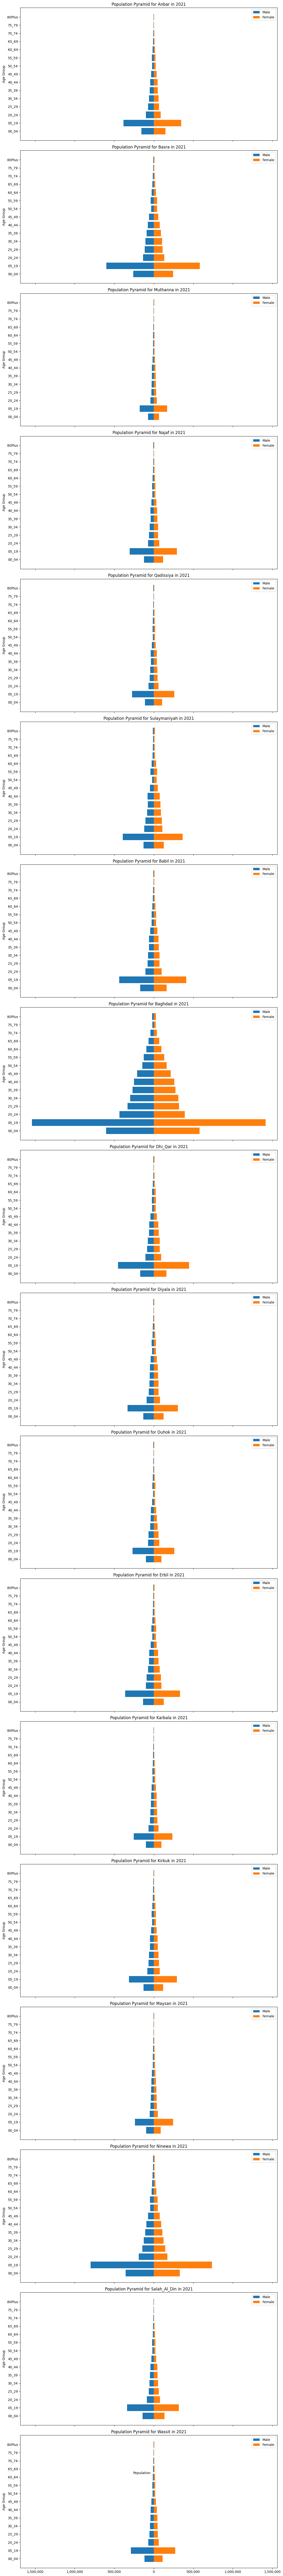

In [47]:
#2021 - population pyramids m/f

comparison_year = 2021  # You can change the year here
governorates_to_compare = ['anbar', 'basra', 'muthanna', 'najaf', 'qadissiya',
                       'sulaymaniyah', 'babil', 'baghdad', 'dhi_qar', 'diyala',
                       'duhok', 'erbil', 'karbala', 'kirkuk', 'maysan',
                       'ninewa', 'salah_al_din', 'wassit'] # Add or remove governorates

# Filter the DataFrame for the selected year and governorates
comparison_data = iraq_pop_gender_age_df[
    (iraq_pop_gender_age_df['year'] == comparison_year) &
    (iraq_pop_gender_age_df['gov_code'].isin(governorates_to_compare))
].copy() # Use .copy() to avoid SettingWithCopyWarning

# Reshape the data for plotting - melt for age groups and gender
comparison_data_melted = comparison_data.melt(
    id_vars=['gov_code', 'year', 'total_pop', 'female_total', 'male_total'],
    var_name='Age_Gender',
    value_name='Population'
)

# Separate age group and gender into two columns
comparison_data_melted['Gender'] = comparison_data_melted['Age_Gender'].apply(lambda x: x.split('_')[0])
comparison_data_melted['Age_Group'] = comparison_data_melted['Age_Gender'].apply(lambda x: '_'.join(x.split('_')[1:]))

# Filter out the total population rows and ensure correct data types
comparison_data_melted = comparison_data_melted[
    (comparison_data_melted['Gender'] == 'F') | (comparison_data_melted['Gender'] == 'M')
].copy()

# Convert population to numeric, coercing errors
comparison_data_melted['Population'] = pd.to_numeric(comparison_data_melted['Population'], errors='coerce')

# Drop rows where Population is NaN after coercion
comparison_data_melted.dropna(subset=['Population'], inplace=True)


# Order age groups for plotting
age_group_order = [col.replace('F_', '') for col in iraq_pop_gender_age_df.columns if col.startswith('F_')]
comparison_data_melted['Age_Group'] = pd.Categorical(comparison_data_melted['Age_Group'], categories=age_group_order, ordered=True)

# Separate male and female data
male_data = comparison_data_melted[comparison_data_melted['Gender'] == 'M'].copy()
female_data = comparison_data_melted[comparison_data_melted['Gender'] == 'F'].copy()

# Plotting
fig, axes = plt.subplots(nrows=len(governorates_to_compare), figsize=(12, 6 * len(governorates_to_compare)), sharex=True)

if len(governorates_to_compare) == 1:
    axes = [axes] # Ensure axes is iterable even for a single governorate

for i, gov_code in enumerate(governorates_to_compare):
    ax = axes[i]
    gov_male_data = male_data[male_data['gov_code'] == gov_code].sort_values(by='Age_Group') # Sort by Age_Group
    gov_female_data = female_data[female_data['gov_code'] == gov_code].sort_values(by='Age_Group') # Sort by Age_Group

    # Ensure age groups are in the correct order for plotting
    male_population_ordered = [gov_male_data[gov_male_data['Age_Group'] == age]['Population'].iloc[0] if not gov_male_data[gov_male_data['Age_Group'] == age].empty else 0 for age in age_group_order]
    female_population_ordered = [gov_female_data[gov_female_data['Age_Group'] == age]['Population'].iloc[0] if not gov_female_data[gov_female_data['Age_Group'] == age].empty else 0 for age in age_group_order]


    # Plot male population as negative bars (width is Population, y is Age_Group)
    ax.barh(age_group_order, [-pop for pop in male_population_ordered], label='Male', color='C0')

    # Plot female population as positive bars (width is Population, y is Age_Group)
    ax.barh(age_group_order, female_population_ordered, label='Female', color='C1')


    # Set title and labels for each subplot
    ax.set_title(f'Population Pyramid for {gov_code.title()} in {comparison_year}')
    ax.set_ylabel('Age Group')
    ax.legend()

    # Format the x-axis to show absolute population values
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{abs(x):,.0f}'))

# Set a common x-label for all subplots
fig.text(0.5, 0.04, 'Population', ha='center')

plt.tight_layout()
plt.show()

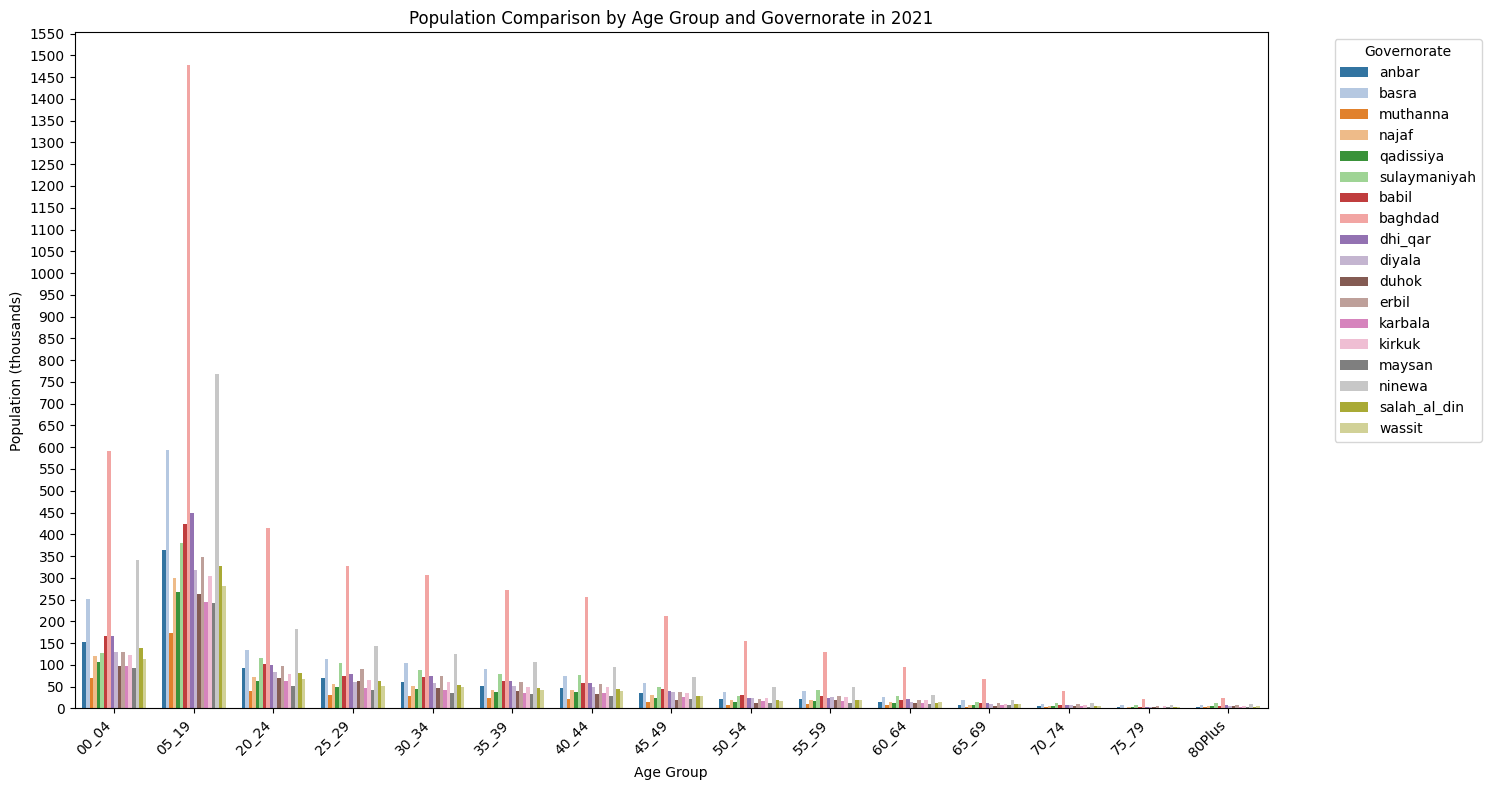

In [46]:
#2021 - bar chart pop/governorate/age

comparison_year = 2021  # You can change the year here
governorates_to_compare = ['anbar', 'basra', 'muthanna', 'najaf', 'qadissiya',
                       'sulaymaniyah', 'babil', 'baghdad', 'dhi_qar', 'diyala',
                       'duhok', 'erbil', 'karbala', 'kirkuk', 'maysan',
                       'ninewa', 'salah_al_din', 'wassit'] # Add or remove governorates

# Filter the DataFrame for the selected year and governorates
comparison_data = iraq_pop_gender_age_df[
    (iraq_pop_gender_age_df['year'] == comparison_year) &
    (iraq_pop_gender_age_df['gov_code'].isin(governorates_to_compare))
].copy() # Use .copy() to avoid SettingWithCopyWarning

# Reshape the data for plotting - melt for age groups and gender
comparison_data_melted = comparison_data.melt(
    id_vars=['gov_code', 'year', 'total_pop', 'female_total', 'male_total'],
    var_name='Age_Gender',
    value_name='Population'
)

# Separate age group and gender into two columns
comparison_data_melted['Gender'] = comparison_data_melted['Age_Gender'].apply(lambda x: x.split('_')[0])
comparison_data_melted['Age_Group'] = comparison_data_melted['Age_Gender'].apply(lambda x: '_'.join(x.split('_')[1:]))

# Filter out the total population rows and ensure correct data types
comparison_data_melted = comparison_data_melted[
    (comparison_data_melted['Gender'] == 'F') | (comparison_data_melted['Gender'] == 'M')
].copy()

# Convert population to numeric, coercing errors
comparison_data_melted['Population'] = pd.to_numeric(comparison_data_melted['Population'], errors='coerce')

# Drop rows where Population is NaN after coercion
comparison_data_melted.dropna(subset=['Population'], inplace=True)


# Order age groups for plotting
age_group_order = [col.replace('F_', '') for col in iraq_pop_gender_age_df.columns if col.startswith('F_')]
comparison_data_melted['Age_Group'] = pd.Categorical(comparison_data_melted['Age_Group'], categories=age_group_order, ordered=True)

# Plotting
plt.figure(figsize=(15, 8))
ax = sns.barplot( # Assign the axes object to ax
    data=comparison_data_melted,
    x='Age_Group',
    y='Population',
    hue='gov_code',
    palette='tab20', # Changed palette to 'tab20' for more distinct colors
    errorbar=None, # Remove error bars for cleaner look if not needed
    dodge=True # Add dodge=True to separate bars for different hues
)

plt.title(f'Population Comparison by Age Group and Governorate in {comparison_year}')
plt.xlabel('Age Group')
plt.ylabel('Population (thousands)') # Update y-axis label

plt.xticks(rotation=45, ha='right')
plt.legend(title='Governorate', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis to show population in thousands for readability
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}'))

# Set y-axis major locator to have more indicators, e.g., every 50,000
ax.yaxis.set_major_locator(mticker.MultipleLocator(50000))

plt.tight_layout()
plt.show()

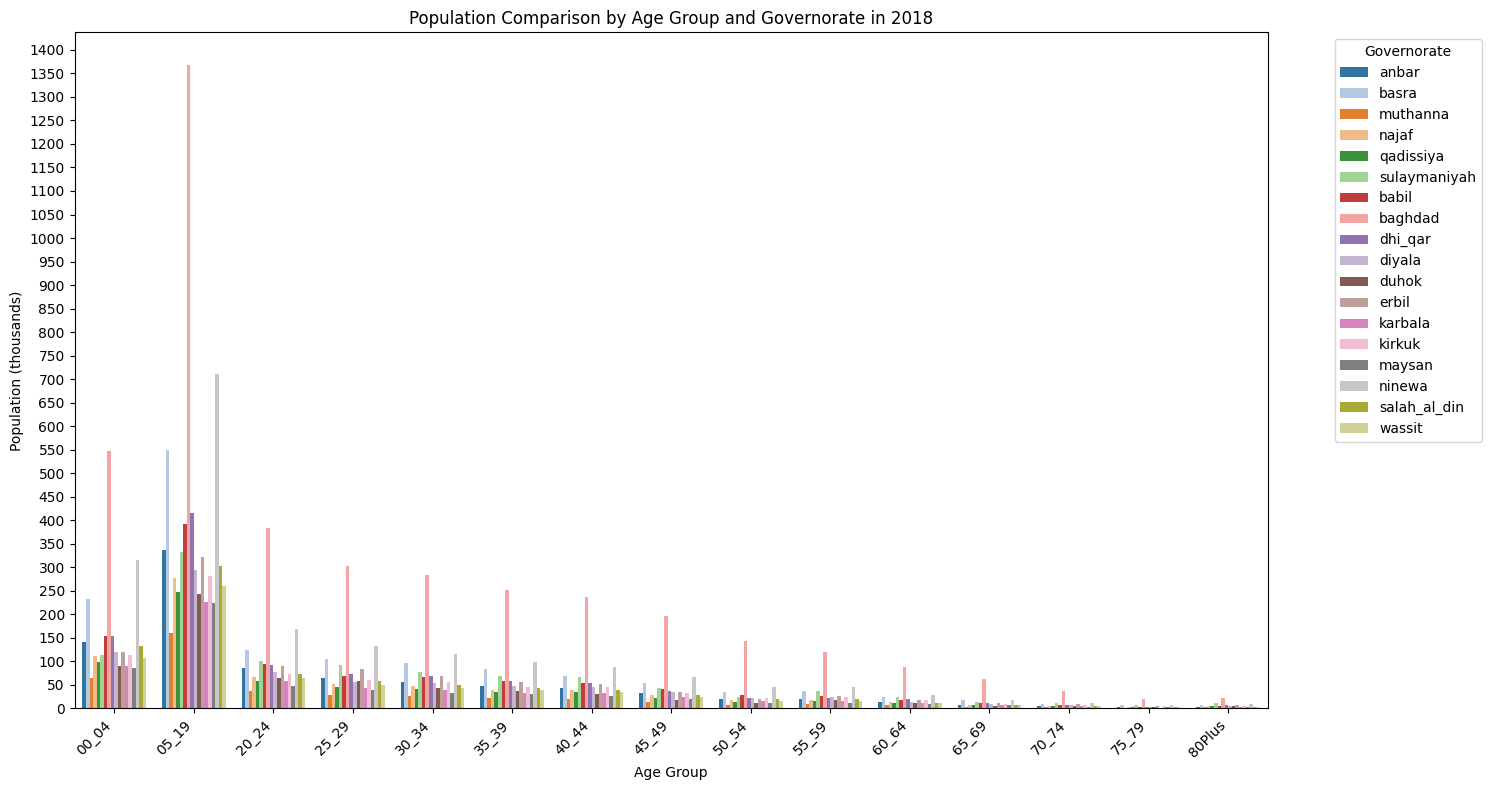

In [53]:
# 2018

comparison_year = 2018
governorates_to_compare = ['anbar', 'basra', 'muthanna', 'najaf', 'qadissiya', 'sulaymaniyah', 'babil', 'baghdad', 'dhi_qar', 'diyala', 'duhok', 'erbil', 'karbala', 'kirkuk', 'maysan', 'ninewa', 'salah_al_din', 'wassit']

comparison_data = iraq_pop_gender_age_df[
    (iraq_pop_gender_age_df['year'] == comparison_year) &
    (iraq_pop_gender_age_df['gov_code'].isin(governorates_to_compare))
].copy()

comparison_data_melted = comparison_data.melt(
    id_vars=['gov_code', 'year', 'total_pop', 'female_total', 'male_total'],
    var_name='Age_Gender',
    value_name='Population'
)

comparison_data_melted['Gender'] = comparison_data_melted['Age_Gender'].apply(lambda x: x.split('_')[0])
comparison_data_melted['Age_Group'] = comparison_data_melted['Age_Gender'].apply(lambda x: '_'.join(x.split('_')[1:]))

comparison_data_melted = comparison_data_melted[
    (comparison_data_melted['Gender'] == 'F') | (comparison_data_melted['Gender'] == 'M')
].copy()

comparison_data_melted['Population'] = pd.to_numeric(comparison_data_melted['Population'], errors='coerce')

comparison_data_melted.dropna(subset=['Population'], inplace=True)

age_group_order = [col.replace('F_', '') for col in iraq_pop_gender_age_df.columns if col.startswith('F_')]
comparison_data_melted['Age_Group'] = pd.Categorical(comparison_data_melted['Age_Group'], categories=age_group_order, ordered=True)

plt.figure(figsize=(15, 8))
ax = sns.barplot(
  data=comparison_data_melted,
  x='Age_Group',
  y='Population',
  hue='gov_code',
  palette='tab20',
  errorbar=None,
  dodge=True
)

plt.title(f'Population Comparison by Age Group and Governorate in {comparison_year}')
plt.xlabel('Age Group')
plt.ylabel('Population (thousands)')

plt.xticks(rotation=45, ha='right')
plt.legend(title = 'Governorate', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
ax.yaxis.set_major_locator(mticker.MultipleLocator(50000))

plt.tight_layout()
plt.show()

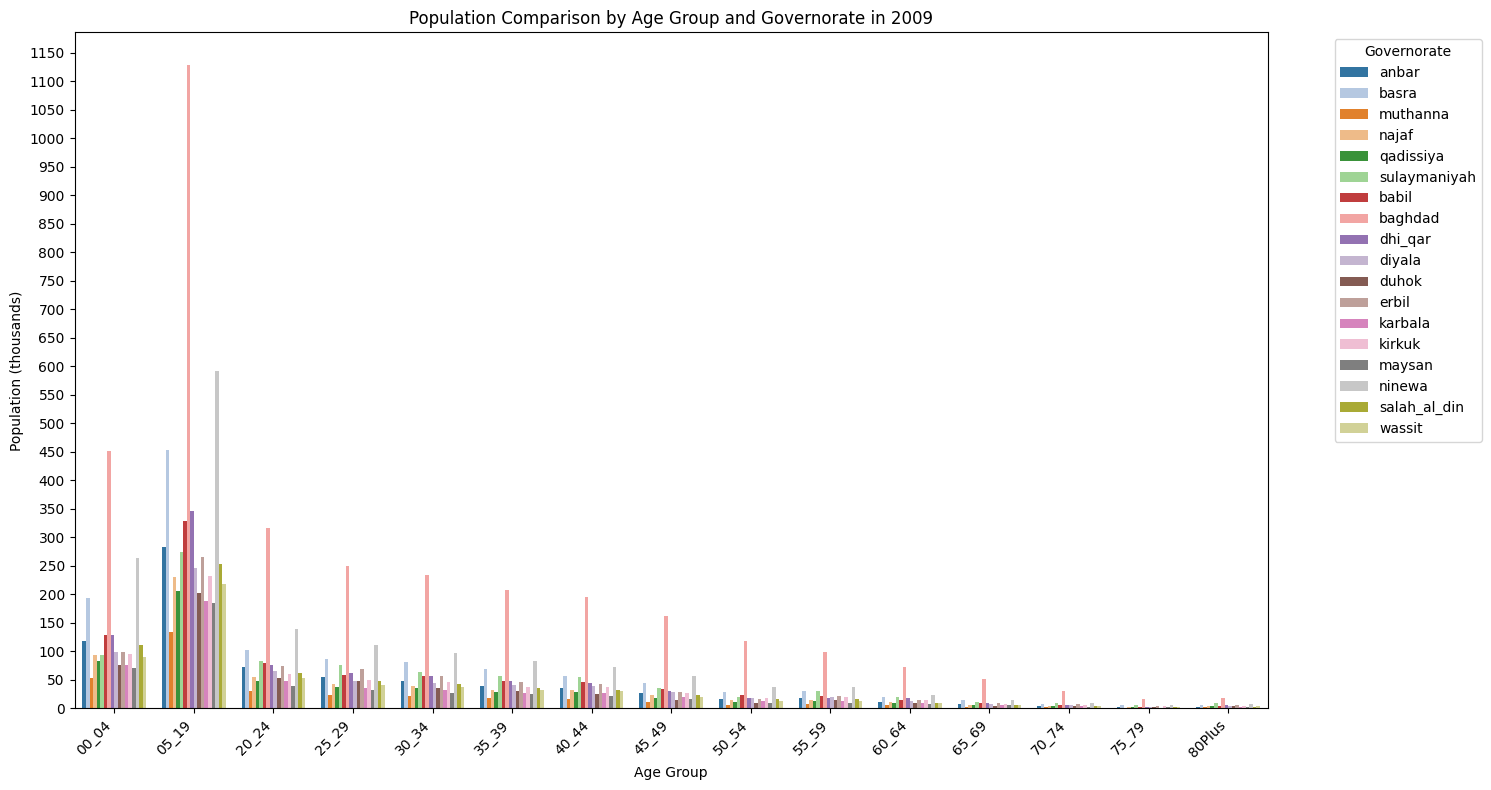

In [54]:
# 2009

comparison_year = 2009
governorates_to_compare = ['anbar', 'basra', 'muthanna', 'najaf', 'qadissiya', 'sulaymaniyah', 'babil', 'baghdad', 'dhi_qar', 'diyala', 'duhok', 'erbil', 'karbala', 'kirkuk', 'maysan', 'ninewa', 'salah_al_din', 'wassit']

comparison_data = iraq_pop_gender_age_df[
    (iraq_pop_gender_age_df['year'] == comparison_year) &
    (iraq_pop_gender_age_df['gov_code'].isin(governorates_to_compare))
].copy()

comparison_data_melted = comparison_data.melt(
    id_vars=['gov_code', 'year', 'total_pop', 'female_total', 'male_total'],
    var_name='Age_Gender',
    value_name='Population'
)

comparison_data_melted['Gender'] = comparison_data_melted['Age_Gender'].apply(lambda x: x.split('_')[0])
comparison_data_melted['Age_Group'] = comparison_data_melted['Age_Gender'].apply(lambda x: '_'.join(x.split('_')[1:]))

comparison_data_melted = comparison_data_melted[
    (comparison_data_melted['Gender'] == 'F') | (comparison_data_melted['Gender'] == 'M')
].copy()

comparison_data_melted['Population'] = pd.to_numeric(comparison_data_melted['Population'], errors='coerce')

comparison_data_melted.dropna(subset=['Population'], inplace=True)

age_group_order = [col.replace('F_', '') for col in iraq_pop_gender_age_df.columns if col.startswith('F_')]
comparison_data_melted['Age_Group'] = pd.Categorical(comparison_data_melted['Age_Group'], categories=age_group_order, ordered=True)

plt.figure(figsize=(15, 8))
ax = sns.barplot(
  data=comparison_data_melted,
  x='Age_Group',
  y='Population',
  hue='gov_code',
  palette='tab20',
  errorbar=None,
  dodge=True
)

plt.title(f'Population Comparison by Age Group and Governorate in {comparison_year}')
plt.xlabel('Age Group')
plt.ylabel('Population (thousands)')

plt.xticks(rotation=45, ha='right')
plt.legend(title = 'Governorate', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
ax.yaxis.set_major_locator(mticker.MultipleLocator(50000))

plt.tight_layout()
plt.show()

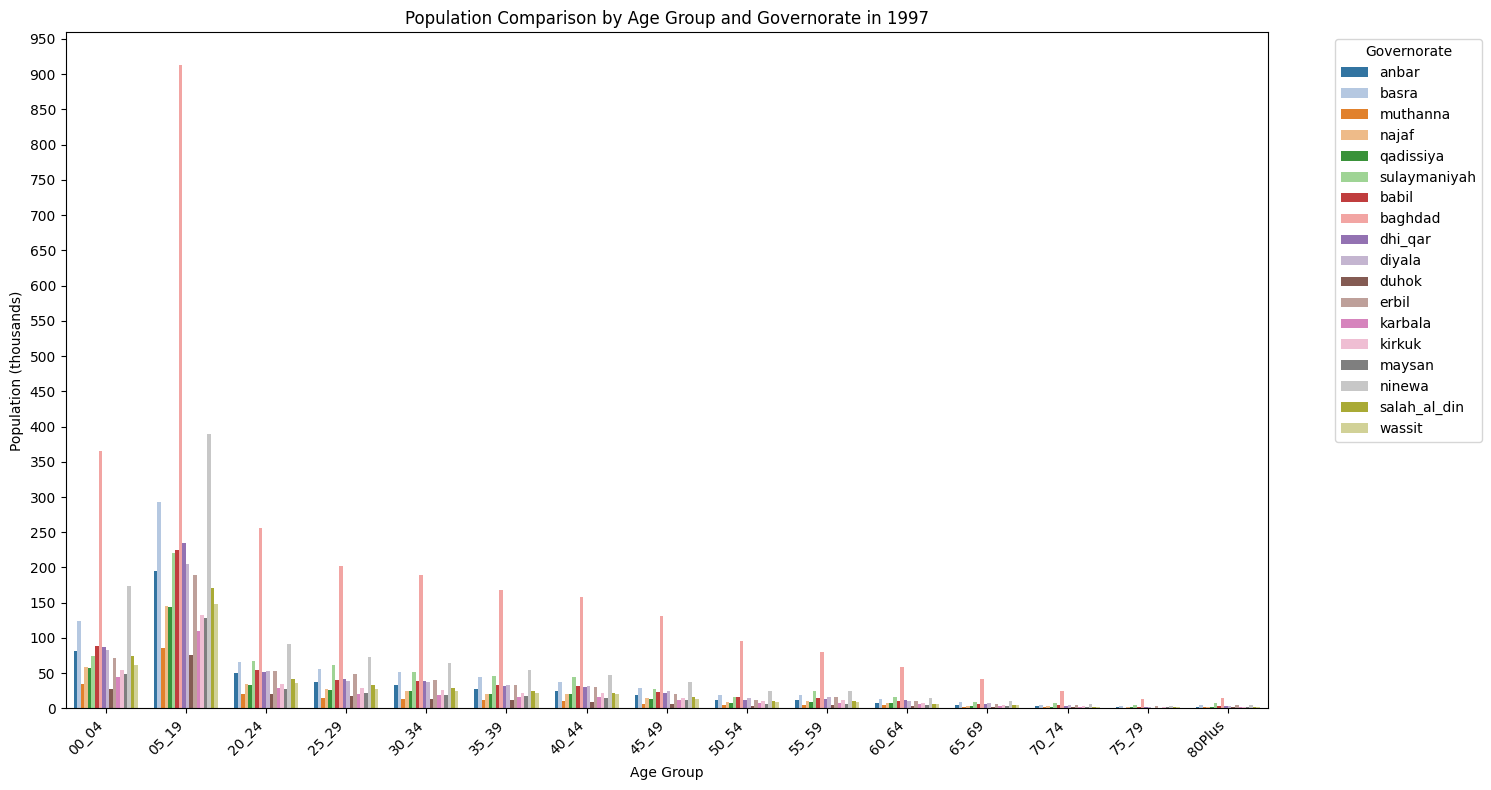

In [55]:
# 1997

comparison_year = 1997
governorates_to_compare = ['anbar', 'basra', 'muthanna', 'najaf', 'qadissiya', 'sulaymaniyah', 'babil', 'baghdad', 'dhi_qar', 'diyala', 'duhok', 'erbil', 'karbala', 'kirkuk', 'maysan', 'ninewa', 'salah_al_din', 'wassit']

comparison_data = iraq_pop_gender_age_df[
    (iraq_pop_gender_age_df['year'] == comparison_year) &
    (iraq_pop_gender_age_df['gov_code'].isin(governorates_to_compare))
].copy()

comparison_data_melted = comparison_data.melt(
    id_vars=['gov_code', 'year', 'total_pop', 'female_total', 'male_total'],
    var_name='Age_Gender',
    value_name='Population'
)

comparison_data_melted['Gender'] = comparison_data_melted['Age_Gender'].apply(lambda x: x.split('_')[0])
comparison_data_melted['Age_Group'] = comparison_data_melted['Age_Gender'].apply(lambda x: '_'.join(x.split('_')[1:]))

comparison_data_melted = comparison_data_melted[
    (comparison_data_melted['Gender'] == 'F') | (comparison_data_melted['Gender'] == 'M')
].copy()

comparison_data_melted['Population'] = pd.to_numeric(comparison_data_melted['Population'], errors='coerce')

comparison_data_melted.dropna(subset=['Population'], inplace=True)

age_group_order = [col.replace('F_', '') for col in iraq_pop_gender_age_df.columns if col.startswith('F_')]
comparison_data_melted['Age_Group'] = pd.Categorical(comparison_data_melted['Age_Group'], categories=age_group_order, ordered=True)

plt.figure(figsize=(15, 8))
ax = sns.barplot(
  data=comparison_data_melted,
  x='Age_Group',
  y='Population',
  hue='gov_code',
  palette='tab20',
  errorbar=None,
  dodge=True
)

plt.title(f'Population Comparison by Age Group and Governorate in {comparison_year}')
plt.xlabel('Age Group')
plt.ylabel('Population (thousands)')

plt.xticks(rotation=45, ha='right')
plt.legend(title = 'Governorate', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}'))
ax.yaxis.set_major_locator(mticker.MultipleLocator(50000))

plt.tight_layout()
plt.show()